In [11]:
%load_ext autoreload
#To update the imported files

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%autoreload
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error
from utilities_EDA import *
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [13]:
#Loading the y-paramter from file, might be changed to y_a etc.
train_a = pd.read_parquet('../Data_and_task/A/train_targets.parquet')
train_b = pd.read_parquet('../Data_and_task/B/train_targets.parquet')
train_c = pd.read_parquet('../Data_and_task/C/train_targets.parquet')

In [14]:
#Loading estimated/forecasted training_weather from file
X_train_estimated_a = pd.read_parquet('../Data_and_task/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../Data_and_task/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../Data_and_task/C/X_train_estimated.parquet')

In [15]:
#Loading observed weather from file
X_train_observed_a = pd.read_parquet('../Data_and_task/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../Data_and_task/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../Data_and_task/C/X_train_observed.parquet')

In [16]:
#Loading estimated/forecasted test_weather from file
X_test_estimated_a = pd.read_parquet('../Data_and_task/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../Data_and_task/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../Data_and_task/C/X_test_estimated.parquet')

In [17]:
#Fjernen kvarter-radene og fjerner "date_calc" kolonnen hvis den finnes
X_train_observed_a_clean = clean_X_data(X_train_observed_a)

C:\Users\Gustav\Documents\maskinlaering\ML_prosject\TDT4173-ML-task\src\Data\Data_exploration\utilities_EDA.py:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = correlation_df.corr()


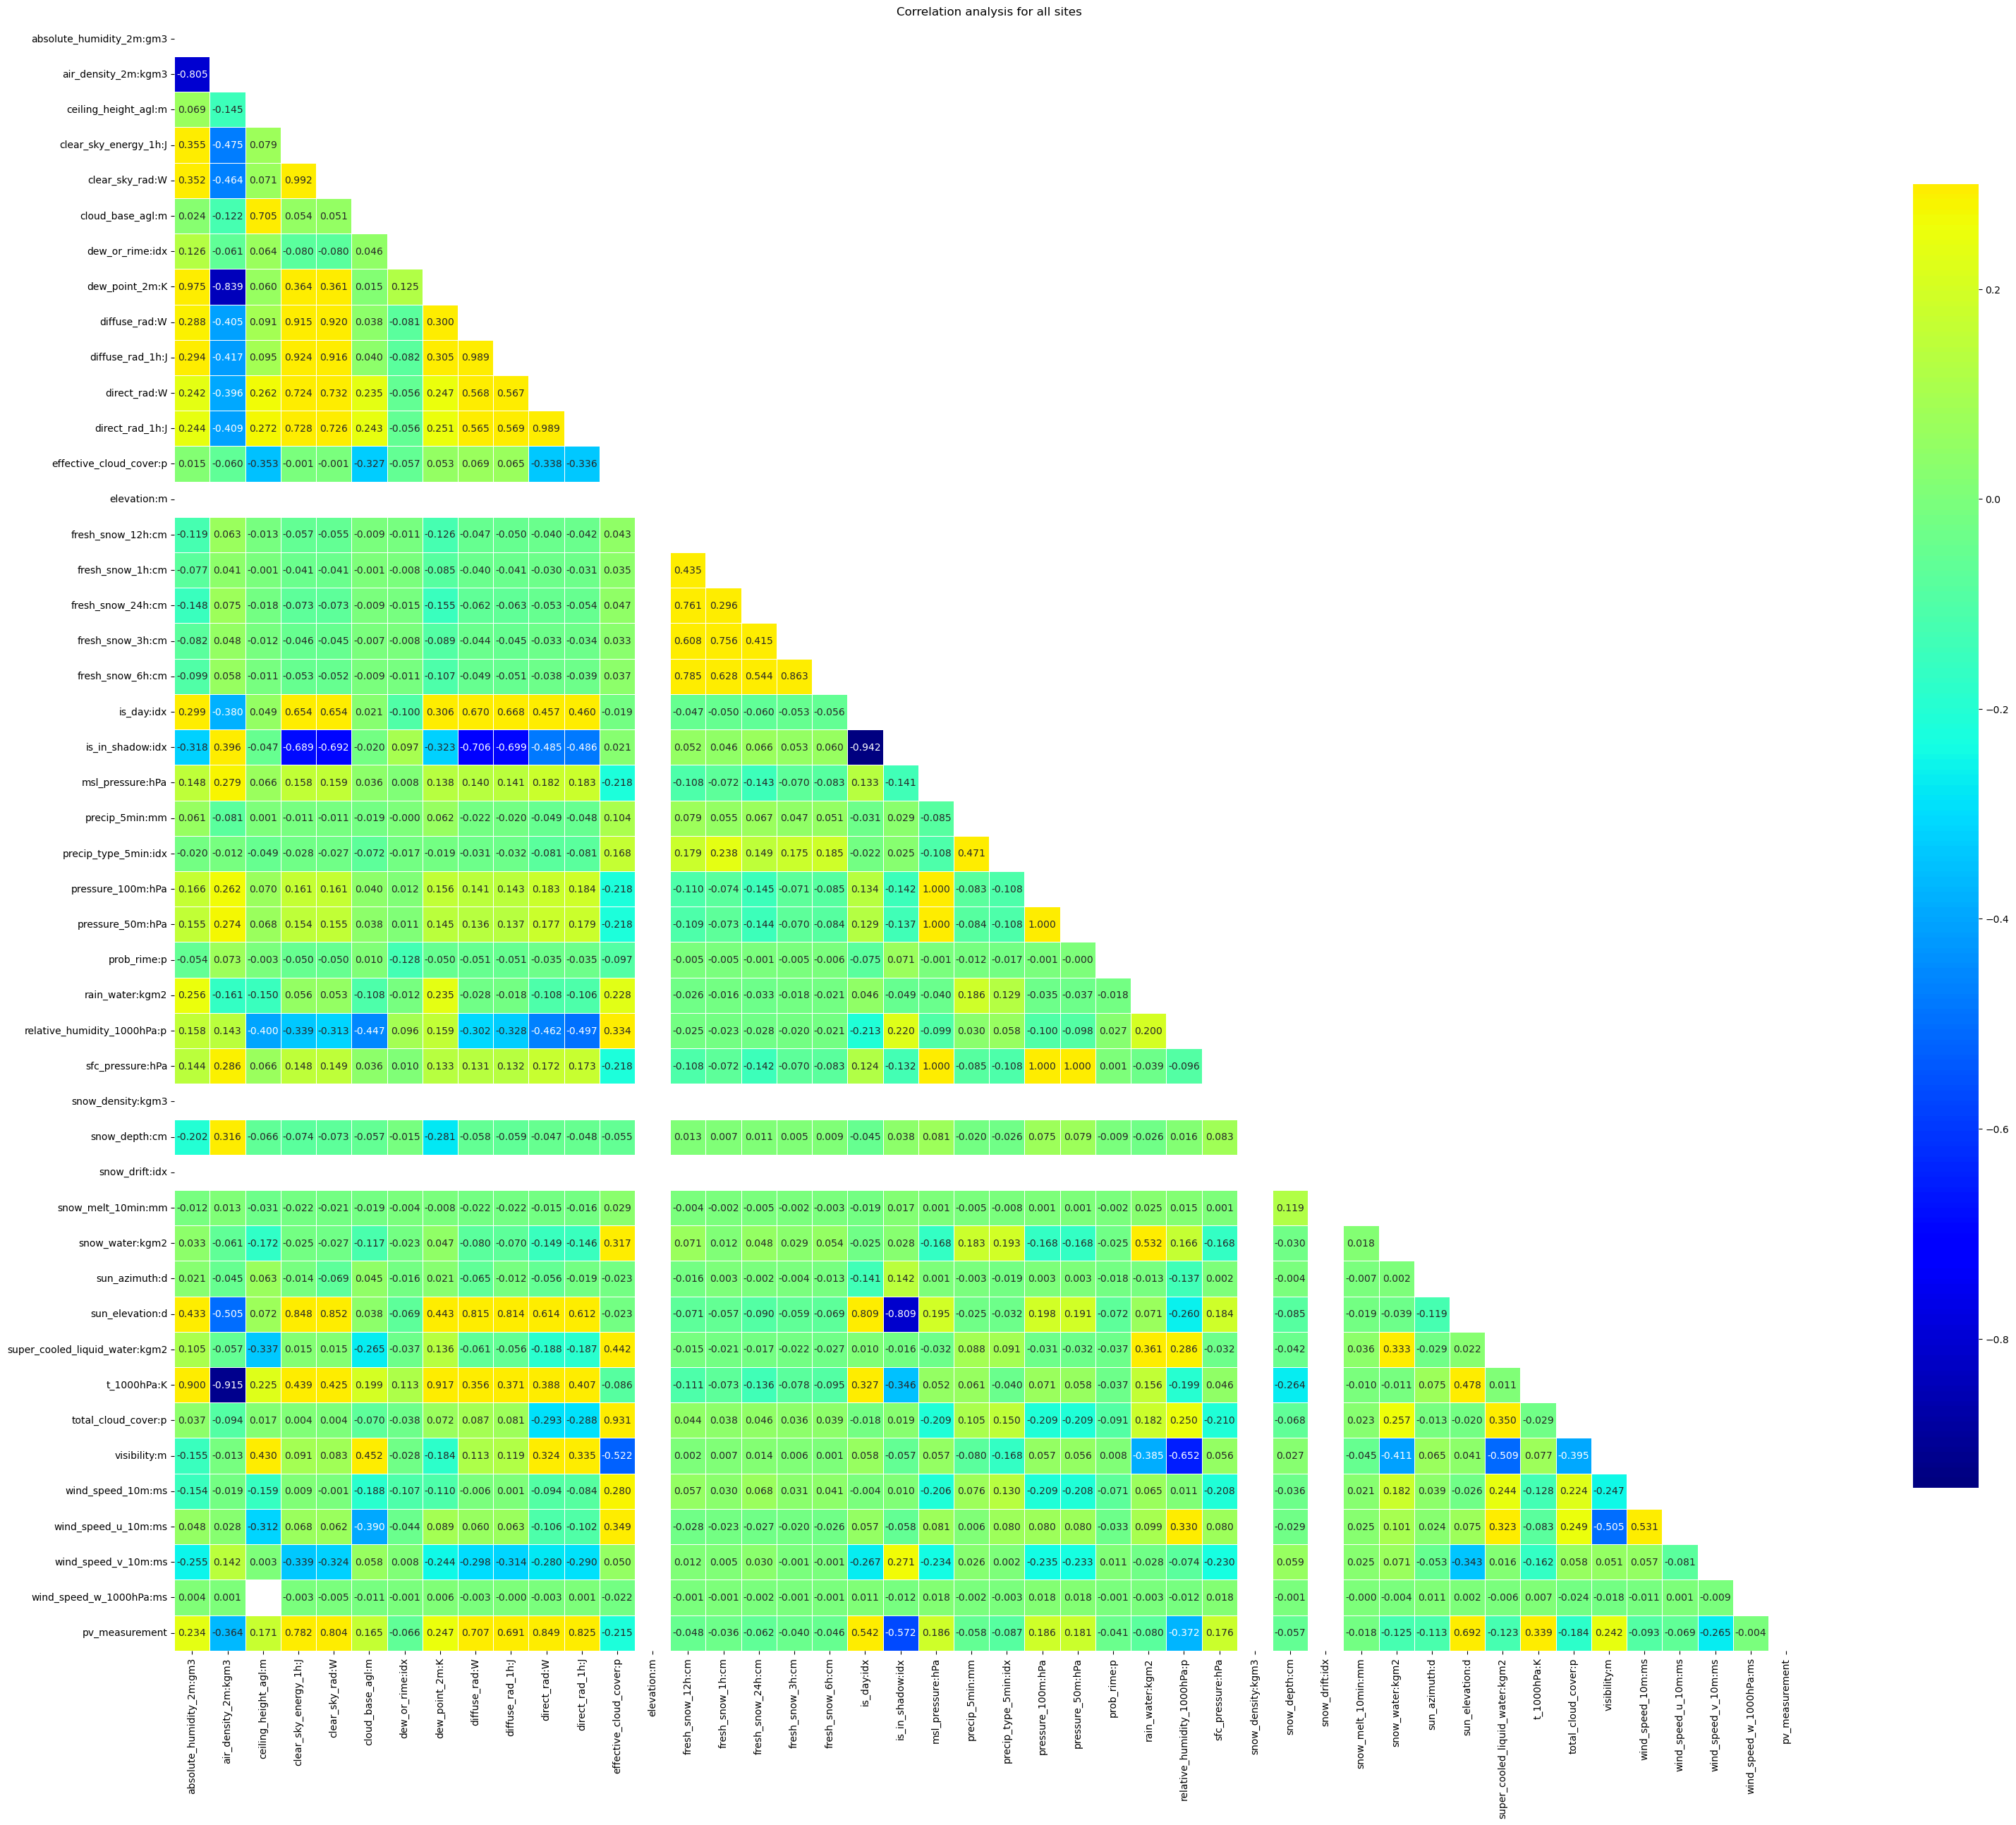

In [18]:
correlation_plot(clean_X_data(X_train_observed_a_clean),train_a)

In [59]:
def change_scale(x):
    #if isinstance(x, (int, float)):  # Check if x is numeric
    #    return np.log(x) if x > 0 else x
    return x

X_train_observed_a["sum"] = X_train_observed_a['direct_rad:W'] * X_train_observed_a['direct_rad_1h:J']
correlation_df = pd.DataFrame({
    "observed_a":correlation(clean_X_data(X_train_observed_a.map(change_scale)),train_a)["pv_measurement"],
    "observed_b":correlation(clean_X_data(X_train_observed_b.map(change_scale)),train_b)["pv_measurement"],
    "observed_c":correlation(clean_X_data(X_train_observed_c.map(change_scale)),train_c)["pv_measurement"],
    "estimated_a":correlation(clean_X_data(X_train_estimated_a.map(change_scale)),train_a)["pv_measurement"],
    "estimated_b":correlation(clean_X_data(X_train_estimated_b.map(change_scale)),train_b)["pv_measurement"],
    "estimated_c":correlation(clean_X_data(X_train_estimated_c.map(change_scale)),train_c)["pv_measurement"],
})

In [60]:
correlation_df

,observed_a,observed_b,observed_c,estimated_a,estimated_b,estimated_c
absolute_humidity_2m:gm3,0.229924,0.326308,0.320863,0.041681,0.058680,0.105518
air_density_2m:kgm3,-0.364369,-0.376864,-0.427060,-0.133887,-0.085192,-0.223042
ceiling_height_agl:m,0.177534,0.175426,0.190529,0.097077,0.057785,0.070167
clear_sky_energy_1h:J,0.781647,0.774912,0.843075,0.759709,0.803965,0.828625
clear_sky_rad:W,0.803990,0.793606,0.857913,0.787613,0.831445,0.816881
cloud_base_agl:m,0.163880,0.202945,0.140562,0.066471,0.045384,0.044497
date_forecast,0.023750,-0.077734,-0.006741,0.339208,0.366957,0.363656
dew_or_rime:idx,-0.065608,-0.022469,0.014944,-0.020751,-0.035938,0.036820
dew_point_2m:K,0.244038,0.329227,0.328974,0.043904,0.066860,0.122715
diffuse_rad:W,0.705704,0.684099,0.732888,0.622477,0.649865,0.659043


In [61]:
snittverdier = correlation_df.mean(axis = 1)
snittverdier = snittverdier.abs()
snittverdier = snittverdier.sort_values(ascending=False)

In [62]:
(snittverdier)

pv_measurement                    1.000000
direct_rad:W                      0.847444
direct_rad_1h:J                   0.828389
clear_sky_rad:W                   0.815241
clear_sky_energy_1h:J             0.798656
sum                               0.732992
diffuse_rad:W                     0.675679
diffuse_rad_1h:J                  0.666998
sun_elevation:d                   0.631819
is_in_shadow:idx                  0.549098
is_day:idx                        0.496506
relative_humidity_1000hPa:p       0.347717
t_1000hPa:K                       0.284436
air_density_2m:kgm3               0.268402
wind_speed_v_10m:ms               0.227387
effective_cloud_cover:p           0.198662
pressure_100m:hPa                 0.197096
msl_pressure:hPa                  0.195226
pressure_50m:hPa                  0.193325
sfc_pressure:hPa                  0.189563
dew_point_2m:K                    0.189287
total_cloud_cover:p               0.181568
absolute_humidity_2m:gm3          0.180496
time       

In [54]:
log = snittverdier

In [48]:
qubr = snittverdier

In [45]:
sqr = snittverdier

In [38]:
sqrt = snittverdier